# Project: Investigate a Dataset - [TMBD Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose the movies dataset for my project. The data set contains information about 10866 movies collected from The Movie Database (TMDb).

### Dataset Description 

The data set contains information about 10866 movies collected from The Movie Database (TMDb), organized in 21 columns including user ratings and revenue. Below is the list of relevant columns for the analysis.

id, popularity, budget, revenue, original_title, runtime, genres, release_date, vote_average , release_year

The currency for the revenue and budget column is assumed to be in dollars for this analysis

 
### The Questions that I intend to answer in this analysis are;

- which movie has the Highest And Lowest Budget?
- Which movie made the highest revenue as well as the lowest revenue?
- Which year has the highest number of movie release?.
- Which Genre Has The Highest number of movie release?
- What kinds of properties are associated with movies that have high revenues?

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [29]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [31]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [32]:
# checking the column information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [33]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


### 1. Remove duplicate values

I investigated the dataset for duplicate values in the following cells below

In [34]:
# get the total number of duplicate values
df.duplicated().sum()

1

In [35]:
# removing duplicate values
df.drop_duplicates(inplace=True)

In [36]:
# confirming that the duplicate value has been removed
df.duplicated().sum()

0

### 2. Remove Irrelevant columns from the data frame

The dataset contains some columns that are irrelevant in answering the questions that I intended to answer. I remove those columns in the following cells below

In [37]:
df.drop(['imdb_id','homepage','cast','director','tagline','keywords','overview','budget_adj','revenue_adj','production_companies'],axis =1,inplace = True)
df.shape

(10865, 11)

In [38]:
df.head(3)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


### 3. Changing the data type of the release_date column

I noticed that the data type of the release_date column is stored as string instead of date. I converted the data type to date format in the following cells below  

In [39]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

### 4. Remove missing values

I noticed some missing values in the genre column. I removed thos columns in the following cells below

In [40]:
# Displaying number of missing values in each columns
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [41]:
df.shape

(10865, 11)

In [42]:
# drop rows with null values
df.dropna(inplace=True)

In [43]:
# reconfirming the data frame
df.isnull().sum()
#df.shape

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: which movie has the Highest And Lowest Budget?

In [44]:
#I created 'find_max' function
#I used the function 'idmin' to find the index of lowest profit movie. 
#I also used the function 'idmax' to find the index of Highest profit movie.
#then I print the movie with high and low profit

def find_minmax(x):
    min_index = df[x].idxmin()
    max_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[max_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    print("The Movie with the Highest "+ x + " : ",df['original_title'][max_index])
    print("The Movie with the Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

df['budget'] = df['budget'].replace(0,np.NAN)
find_minmax('budget')

The Movie with the Highest budget :  The Warrior's Way
The Movie with the Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00
vote_count,74,15
vote_average,6.4,4.1


### **Discussion 1**
From the above, the movie "The Warrior's way" has the highest budget of about 425 Millions dollars. And the movie 'Fear Clinic' has the lowest budget of 1

### Question 2: Which movie made the highest revenue as well as the lowest revenue?

In [45]:
#I used the 'findmax' function earlier to get the highest and lowest revenue
find_minmax('revenue')

The Movie with the Highest revenue :  Avatar
The Movie with the Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00
vote_count,8458,481
vote_average,7.1,5.3


### **Discussion 2**
From the above, the movie "Avatar" has the highest revunue of about 237 Million dollars. And the movie 'Wild Card' has the lowest revenue of 0

### Question 3: Which year has the highest number of movie release?

In [46]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# getting the count of movie, grouping by release year
countM=df.groupby('release_year').count()['id']

In [47]:
countM.describe()

count     56.000000
mean     193.607143
std      187.422874
min       31.000000
25%       46.750000
50%      128.500000
75%      247.250000
max      699.000000
Name: id, dtype: float64

Text(0,0.5,'Number Of movies released')

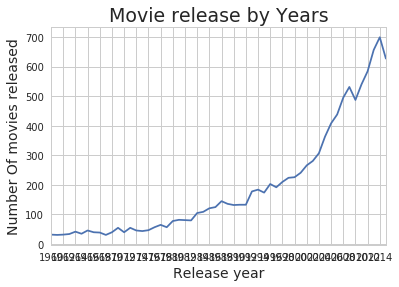

In [48]:
# creating a line plot of the number of movie per year
countM.plot(xticks = np.arange(1960,2016,2))
sns.set(rc={'figure.figsize':(16,7)})
plt.title("Movie release by Years",fontsize = 19)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of movies released',fontsize = 14)

### **Discussion 3**
From the line plot above there has been a steady increase in the number of movies released every year. 2014 has the highest record of 641 movies. The also reveal sharp drop in the number of movies released during the year 2009 and 2015

### Question 4: Which Genre Has The Highest number of movie release?

In [49]:
# I created a function that will split the string and return the count of each genre.
# Then concatenate all the rows of the genres.
# Then count each of the genre and return.

def func(x):
    func_plot = df[x].str.cat(sep = '|')
    func = pd.Series(func_plot.split('|'))
    genre = func.value_counts(ascending=False)
    return genre

In [50]:
# Count of the number of movie for each genre
total_movie_genre = func('genres')
print(total_movie_genre)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


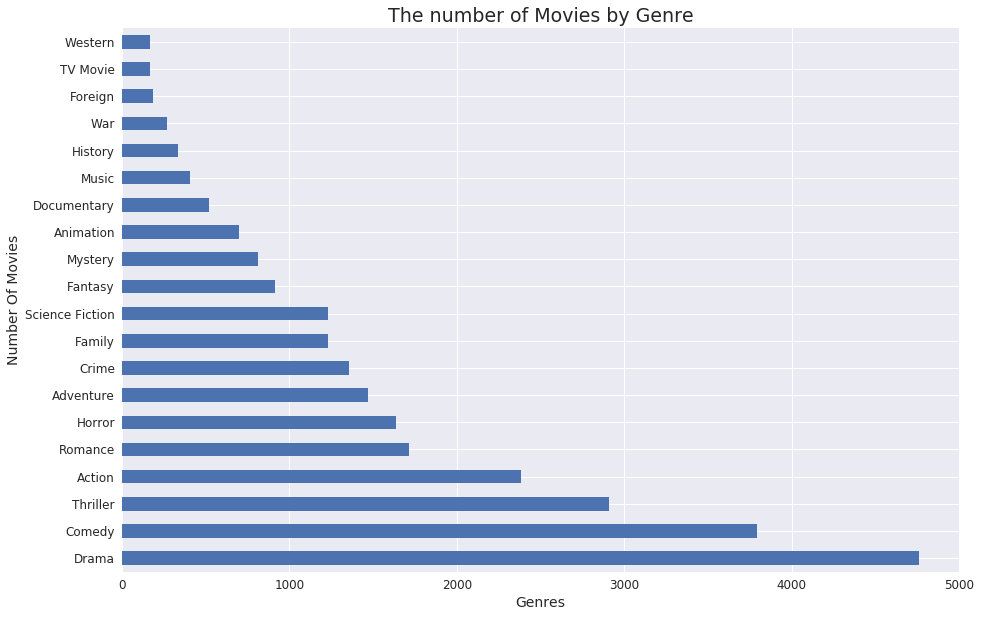

In [51]:
# I created a horizontal bar chart to display the number on movies by genre

total_movie_genre.plot(kind = 'barh',figsize = (15,10),fontsize=12)
plt.title('The number of Movies by Genre',fontsize=19)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Number Of Movies',fontsize= 14)
plt.show()

### **Discussion 4** 

From the horizontal bar chart above, the genre 'Drama' has the highest number of movies 4372 while the genre 'Foreign' has the lowest number of movies 122

### Question 5: What kinds of properties are associated with movies that have high revenues?

In [52]:
# sort the data by the revenue in descending order 
sort = pd.DataFrame(df['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','runtime','genres','vote_average','release_year']
for i in data_set:
    sort[i] = df[i]
sort.head(3)

,revenue,id,popularity,budget,original_title,runtime,genres,vote_average,release_year
1386,2781505847,19995,9.432768,237000000.0,Avatar,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2068178225,140607,11.173104,200000000.0,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1845034188,597,4.355219,200000000.0,Titanic,194,Drama|Romance|Thriller,7.3,1997


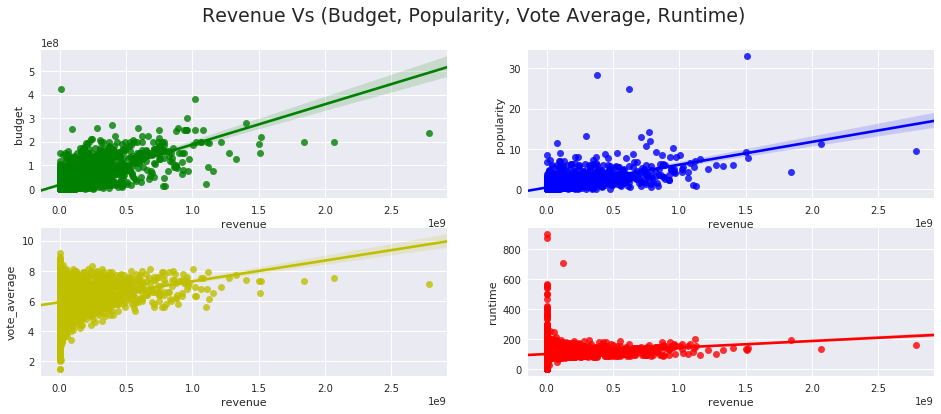

In [53]:
#plot the relevant properties with the revenue
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget, Popularity, Vote Average, Runtime)",fontsize=19)
sns.regplot(x=df['revenue'], y=df['budget'],color='g',ax=axes[0][0])
sns.regplot(x=df['revenue'], y=df['popularity'],color='b',ax=axes[0][1])
sns.regplot(x=df['revenue'], y=df['vote_average'],color='y',ax=axes[1][0])
sns.regplot(x=df['revenue'], y=df['runtime'],color='r',ax=axes[1][1])
sns.set_style("whitegrid")

### **Discussion 5** 

From the regression plot above, revenue has a positive correlation with budget, popularity, runtime, and vote_average.

<a id='conclusions'></a>
## Conclusions

The following points was identified from the analysis

- The movie "The Warrior's way" has the highest budget of about 425 Millions dollars. And the movie 'Fear Clinic' has the lowest budget of 1
- The movie "Avatar" has the highest revunue of about 237 Million dollars. And the movie 'Wild Card' has the lowest revenue of 0
- There is a steady increase in the number of movies released every year. 2014 has the highest record of 641 movies. The also reveal sharp drop in the number of movies released during the year 2009 and 2015
- The genre 'Drama' has the highest number of movies 4372 while the genre 'Foreign' has the lowest number of movies 122
- Revenue has a positive correlation with budget, popularity, runtime, and vote_average


## Limitations

I encountered the following limitations with the data set.

- There was no deifned currency for the figures in the budget and revenue column
- Some of the columns has it's data store using pipes '|'. It would have saved a lot of time during the data cleaning process if the information contain in such colmuns are separated into several columns.


## Reference

I used browse information from the following link during my project

- https://www.kaggle.com/code/deepak525/investigate-tmdb-movie-dataset/notebook
- https://github.com/pandas-dev/pandas/issues/26171
- https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0